In [ ]:
# AOL - Machine Learning
# 2502034912 - Luthfi Izza Pratama
# 2540124450 - Bernard Hugo
# 2501995175 - Sidi Janardhana Gatra Parahita

In [1]:
# Importing basic libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data
df = pd.read_csv("ConcreteStrengthData.csv")

In [3]:
# Intiializing data, basic check using .head(), .info() and .describe()
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# Checking for null values, it seems like there's little to no pre-processing needed to be done
# to this data. Nevertheless, I'm going to plot a few data explorations that I've done.
print("Number of null values in each column: ")
print(df.isnull().sum())

Number of null values in each column: 
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64


In [7]:
# Splitting the data into features (X) and target (Y)
X = df.drop('Strength', axis=1)
Y = df['Strength']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=102)

# Print the shapes to confirm splitting
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (824, 8)
X_test shape:  (206, 8)
y_train shape:  (824,)
y_test shape:  (206,)


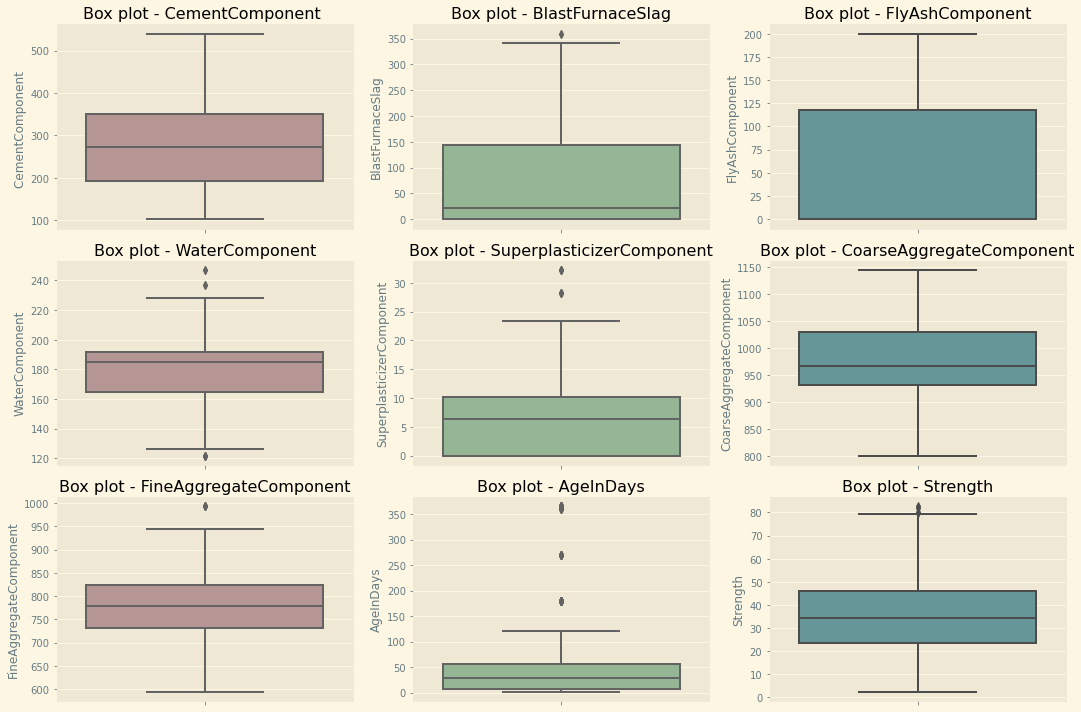

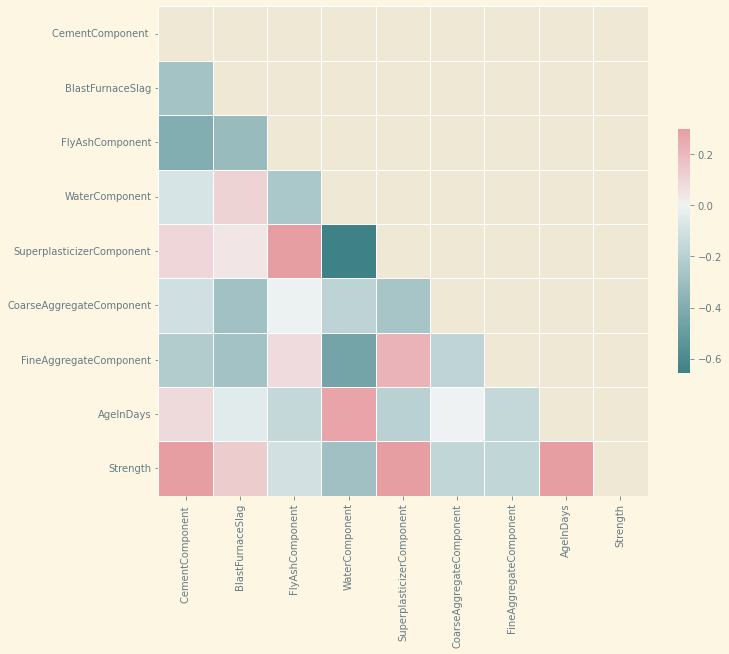

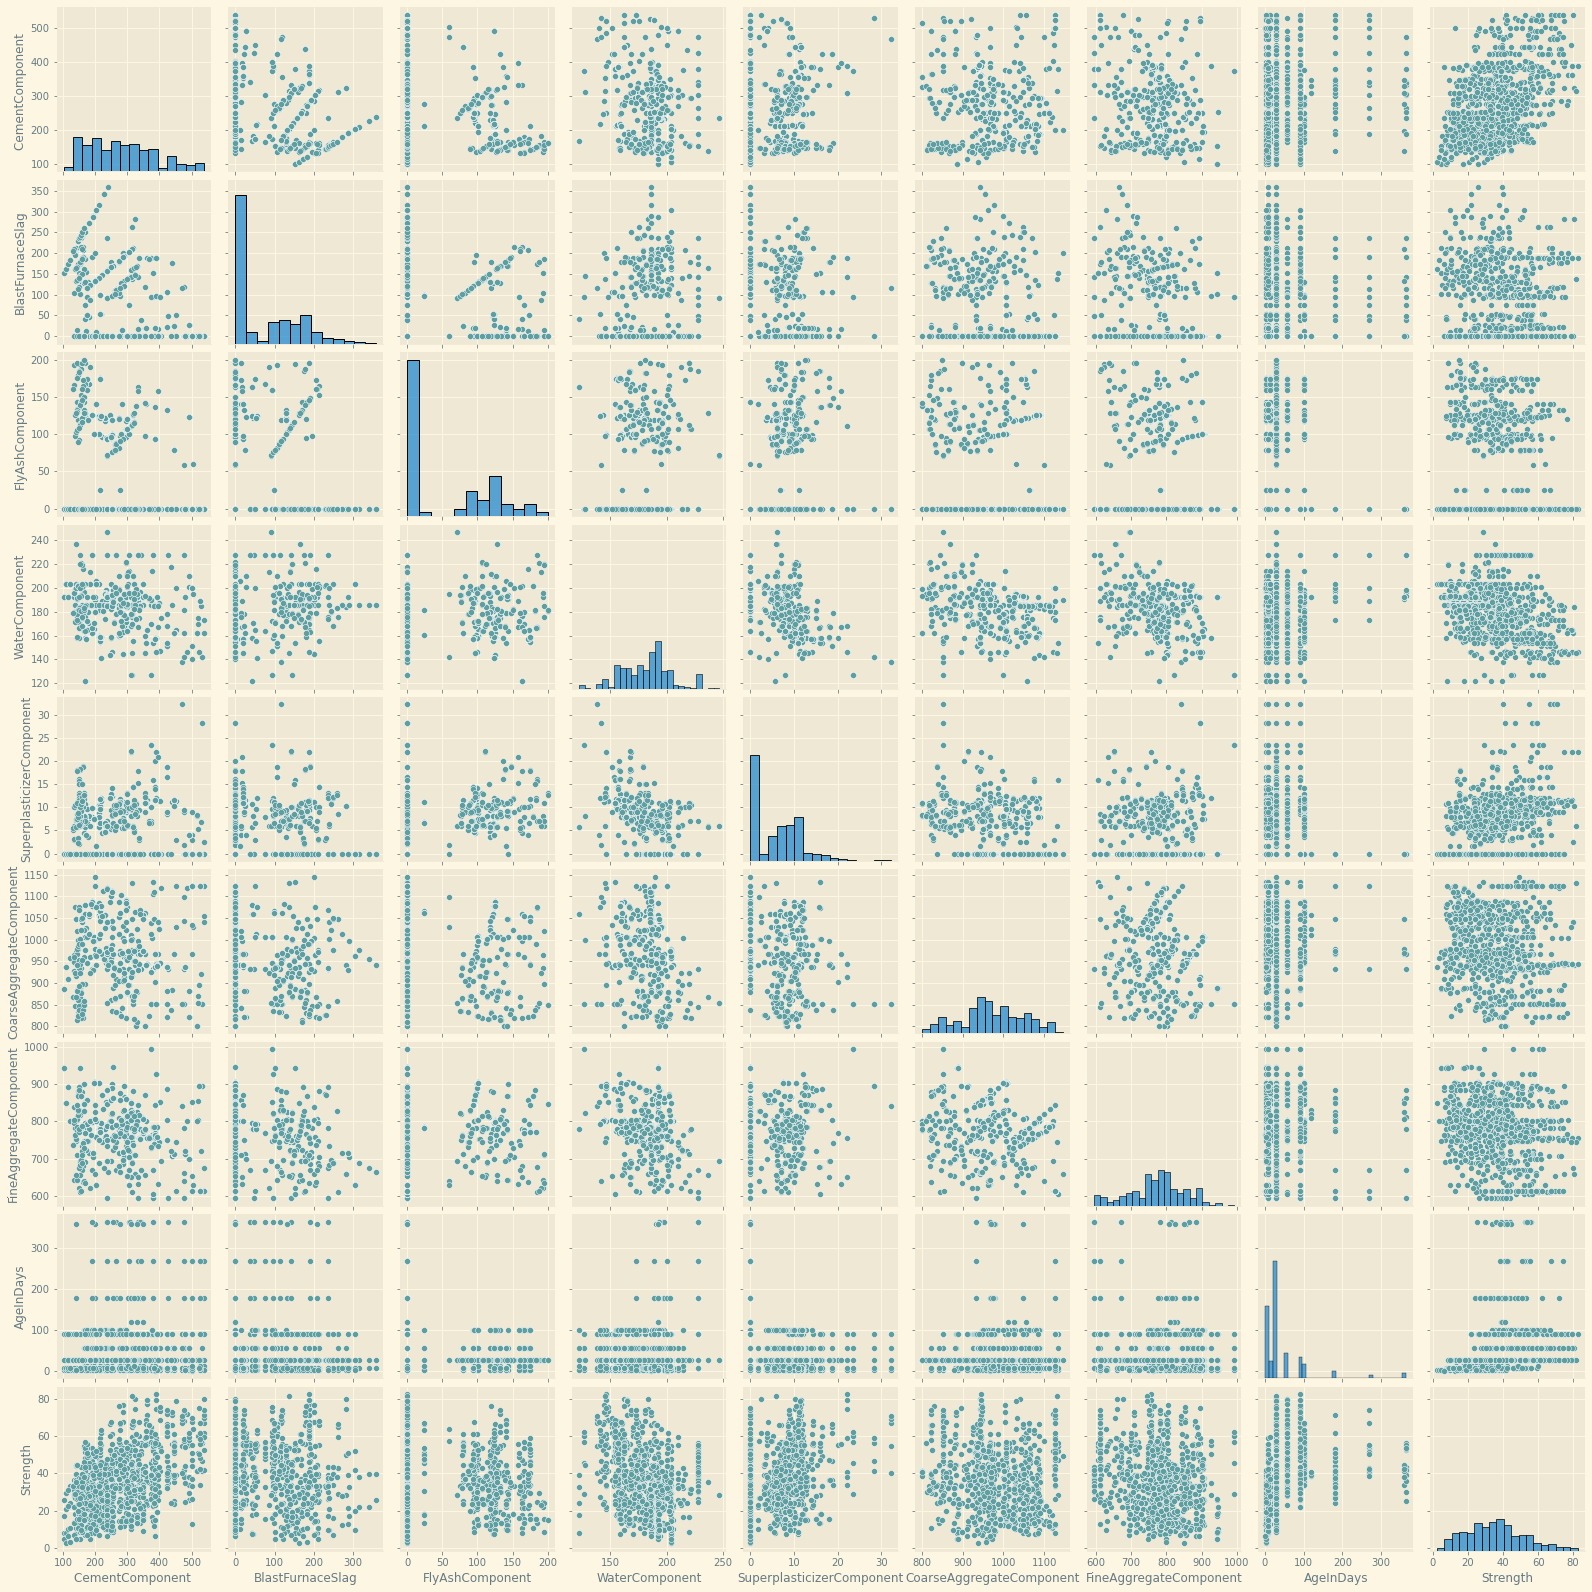

In [8]:
plt.style.use('Solarize_Light2')

plt.figure(figsize=(15, 10))
variables = df.columns.tolist()
colors = ['rosybrown', 'darkseagreen', 'cadetblue', 'slategray']

for i, var in enumerate(variables):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y = df[var], color=colors[i % 3]) # use colors in sequence
    plt.title('Box plot - {}'.format(var))
plt.tight_layout()
plt.show()

# Checking correlations between features
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 10, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Pair plots for visualizing correlations better
sns.pairplot(df, plot_kws={'color': 'cadetblue'})
plt.show()

In [9]:
#Libraries I'm going to use for the machine learning model.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=102)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor")
print("MAE: ", mean_absolute_error(y_test, y_pred_dt))
print("MSE: ", mean_squared_error(y_test, y_pred_dt))
print("R2 Score: ", r2_score(y_test, y_pred_dt))

# Perform GridSearchCV for hyperparameter tuning
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Evaluate the tuned model
best_params = grid_search.best_params_
print(best_params)
dt_optimized = DecisionTreeRegressor(**best_params)
dt_optimized.fit(X_train, y_train)
y_pred_optimized_dt = dt_optimized.predict(X_test)
print("Optimized Decision Tree Regressor")
print("MAE: ", mean_absolute_error(y_test, y_pred_optimized_dt))
print("MSE: ", mean_squared_error(y_test, y_pred_optimized_dt))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_optimized_dt)))
print("R2 Score: ", r2_score(y_test, y_pred_optimized_dt))

Decision Tree Regressor
MAE:  3.987063106796117
MSE:  39.71464963592233
R2 Score:  0.8591951607082762
Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree Regressor
MAE:  4.029587378640777
MSE:  38.15920691747572
RMSE:  6.177313891771708
R2 Score:  0.8647098477068051


In [11]:
# Find the Decision Tree error values before mean squared
dt = DecisionTreeRegressor(random_state=102)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

error_dt = y_test - y_pred_optimized_dt
# Print the error values
print(error_dt)

179    0.00
138   -9.99
74    -6.30
559   -9.81
124   -4.85
       ... 
137    0.00
245    1.03
129    0.00
790   -1.17
58    -3.65
Name: Strength, Length: 206, dtype: float64


In [12]:
# Decide the range of the degrees you want to test
degree_range = range(1, 4) # We're putting the range at a limit of 4 to prevent overfitting.

# Placeholder variables for the best degree and the best model
best_degree = None
best_model = None
best_mae = float('inf')

# Loop through all degrees in the range
for degree in degree_range:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Polynomial Regression (degree={degree})")
    print("MAE: ", mae)
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("-----------------------")

    # If current model has better performance, update best degree and best model
    if mae < best_mae:
        best_degree = degree
        best_model = model
        best_mae = mae

print(f"Best model is Polynomial Regression with degree={best_degree}, MAE={best_mae}")

Polynomial Regression (degree=1)
MAE:  7.881166395419932
MSE:  102.28324335303492
RMSE:  10.113517852509824
R2 Score:  0.637363648563234
-----------------------
Polynomial Regression (degree=2)
MAE:  5.24768229488584
MSE:  47.89622795303597
RMSE:  6.920710075782395
R2 Score:  0.830188085720717
-----------------------
Polynomial Regression (degree=3)
MAE:  4.271397348958071
MSE:  38.80632707043045
RMSE:  6.229472455226883
R2 Score:  0.8624155394358137
-----------------------
Best model is Polynomial Regression with degree=3, MAE=4.271397348958071


In [13]:
# Find the Polynomial Regression error values before mean squared
degree_range = range(1, 4)

for degree in degree_range:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error_poly = y_test - y_pred
# Print the error values
print(error_poly)

179     3.557802
138    -4.591554
74     -0.040219
559     1.085426
124    -0.641849
         ...    
137    11.756642
245     2.439537
129    11.756642
790    -1.488261
58      0.023814
Name: Strength, Length: 206, dtype: float64


In [14]:
# Random Forest
rf = RandomForestRegressor(random_state=102)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Regressor")
print("MAE: ", mean_absolute_error(y_test, y_pred_rf))
print("MSE: ", mean_squared_error(y_test, y_pred_rf))
print("R2 Score: ", r2_score(y_test, y_pred_rf))

# Perform RandomizedSearchCV for hyperparameter tuning
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10, 15, 20],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, 
                                      n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=102)
random_search_rf.fit(X_train, y_train)

# Evaluate the tuned model
best_params_rf = random_search_rf.best_params_
print(best_params_rf)
rf_optimized = RandomForestRegressor(**best_params_rf)
rf_optimized.fit(X_train, y_train)
y_pred_optimized_rf = rf_optimized.predict(X_test)
print("Optimized Random Forest Regressor")
print("MAE: ", mean_absolute_error(y_test, y_pred_optimized_rf))
print("MSE: ", mean_squared_error(y_test, y_pred_optimized_rf))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_optimized_rf)))
print("R2 Score: ", r2_score(y_test, y_pred_optimized_rf))

Random Forest Regressor
MAE:  3.1211954611650463
MSE:  21.022478045992663
R2 Score:  0.9254666308297889
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 100, 'bootstrap': True}
Optimized Random Forest Regressor
MAE:  3.2933995653849917
MSE:  22.63429632891901
RMSE:  4.757551505650675
R2 Score:  0.9197520691661345


In [15]:
# Find the Random Forest error values before mean squared

error_rf = y_test - y_pred_optimized_rf
# Print the error values
print(error_rf)

179    0.892717
138   -8.742442
74    -4.667077
559    0.206886
124   -6.181707
         ...   
137   -0.854112
245    0.156863
129   -0.854112
790   -0.440488
58    -0.972558
Name: Strength, Length: 206, dtype: float64


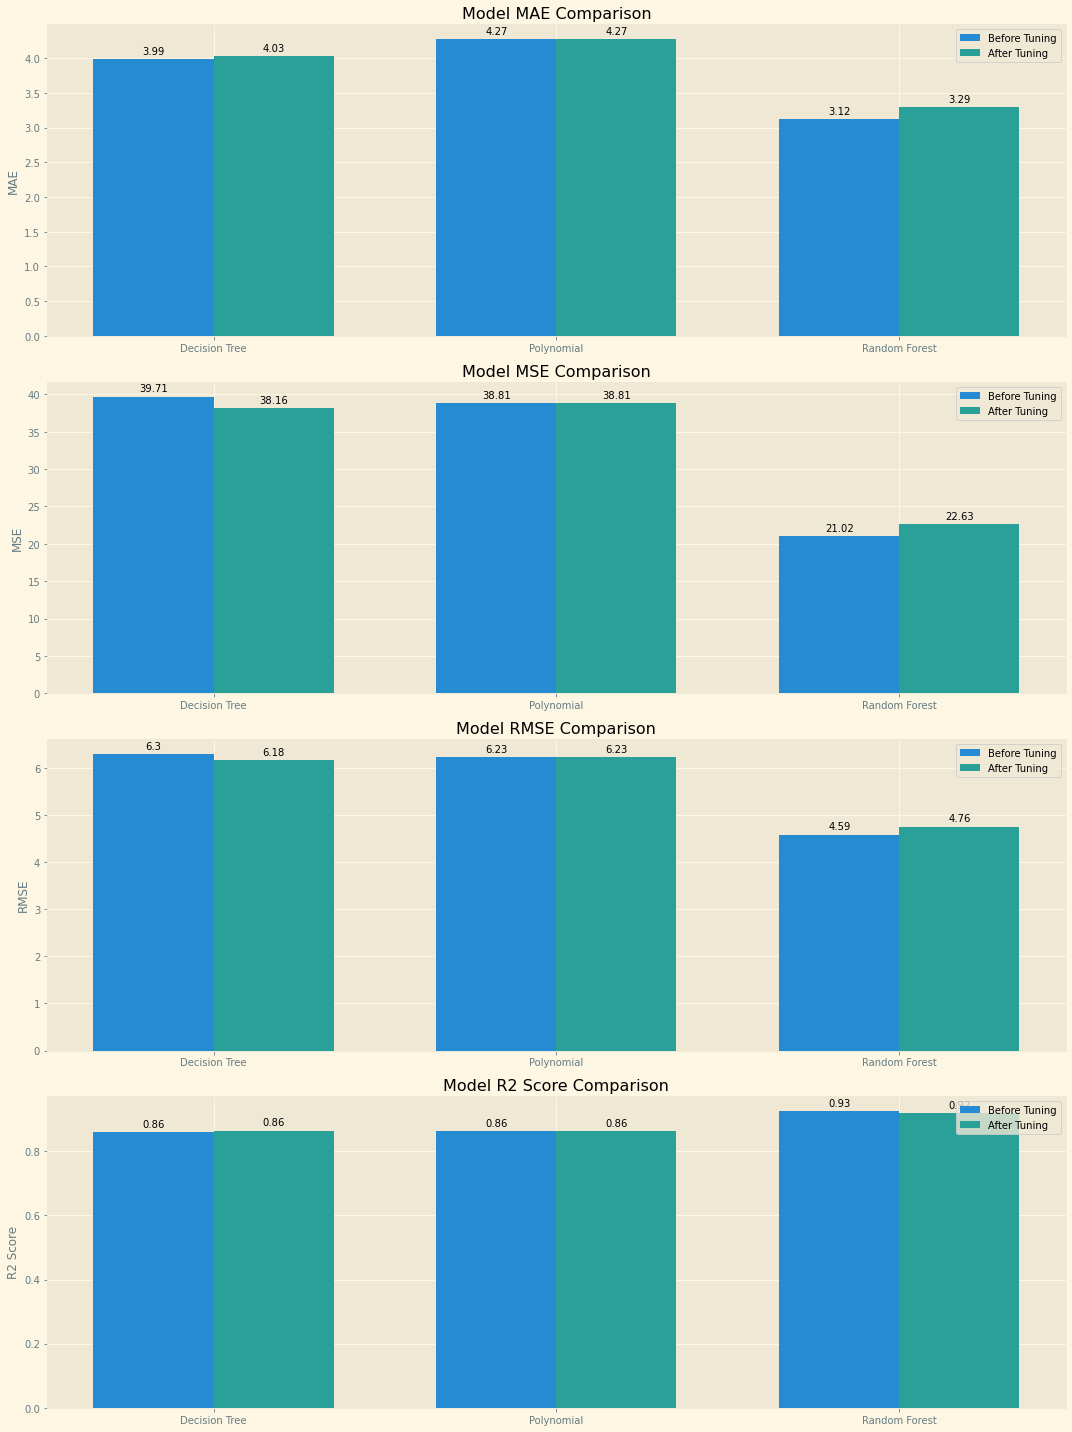

In [16]:
plt.style.use('Solarize_Light2')

# Calculate metrics
models = ['Decision Tree', 'Polynomial', 'Random Forest']
tuning = ['Before Tuning', 'After Tuning']
colors = ['rosybrown', 'darkseagreen', 'cadetblue', 'slategray']

# Initial models' predictions
y_preds_initial = [y_pred_dt, best_model.predict(X_test), y_pred_rf]

# Optimized models' predictions
y_preds_optimized = [y_pred_optimized_dt, best_model.predict(X_test), y_pred_optimized_rf]

mae_values_initial = [mean_absolute_error(y_test, y_pred) for y_pred in y_preds_initial]
mse_values_initial = [mean_squared_error(y_test, y_pred) for y_pred in y_preds_initial]
rmse_values_initial = [np.sqrt(mean_squared_error(y_test, y_pred)) for y_pred in y_preds_initial]
r2_values_initial = [r2_score(y_test, y_pred) for y_pred in y_preds_initial]

mae_values_optimized = [mean_absolute_error(y_test, y_pred) for y_pred in y_preds_optimized]
mse_values_optimized = [mean_squared_error(y_test, y_pred) for y_pred in y_preds_optimized]
rmse_values_optimized = [np.sqrt(mean_squared_error(y_test, y_pred)) for y_pred in y_preds_optimized]
r2_values_optimized = [r2_score(y_test, y_pred) for y_pred in y_preds_optimized]

mae_values = [mae_values_initial, mae_values_optimized]
mse_values = [mse_values_initial, mse_values_optimized]
rmse_values = [rmse_values_initial, rmse_values_optimized]
r2_values = [r2_values_initial, r2_values_optimized]

fig, ax = plt.subplots(4, 1, figsize=(15, 20))

def plot_metric(ax, metric_values, title, ylabel): #making a function to plot out the metrics that have already been grouped.
    width = 0.35
    labels = models
    initial_vals = metric_values[0]
    optimized_vals = metric_values[1]

    x = np.arange(len(labels))

    rects1 = ax.bar(x - width/2, initial_vals, width, label='Before Tuning')
    rects2 = ax.bar(x + width/2, optimized_vals, width, label='After Tuning')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rects in [rects1, rects2]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plot_metric(ax[0], mae_values, 'Model MAE Comparison', 'MAE')
plot_metric(ax[1], mse_values, 'Model MSE Comparison', 'MSE')
plot_metric(ax[2], rmse_values, 'Model RMSE Comparison', 'RMSE')
plot_metric(ax[3], r2_values, 'Model R2 Score Comparison', 'R2 Score')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.ensemble import VotingRegressor

# define the base models
models = [
    ('dt', dt_optimized),
    ('poly', best_model), 
    ('rf', rf_optimized),
]

ensemble = VotingRegressor(estimators=models)
ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

# Printing out the performance of the model.
print("Ensemble Model")
print("MAE: ", mean_absolute_error(y_test, y_pred_ensemble))
print("MSE: ", mean_squared_error(y_test, y_pred_ensemble))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ensemble)))
print("R2 Score: ", r2_score(y_test, y_pred_ensemble))

Ensemble Model
MAE:  3.4590564615717314
MSE:  24.759249375858577
RMSE:  4.975866695949418
R2 Score:  0.9122182327853611


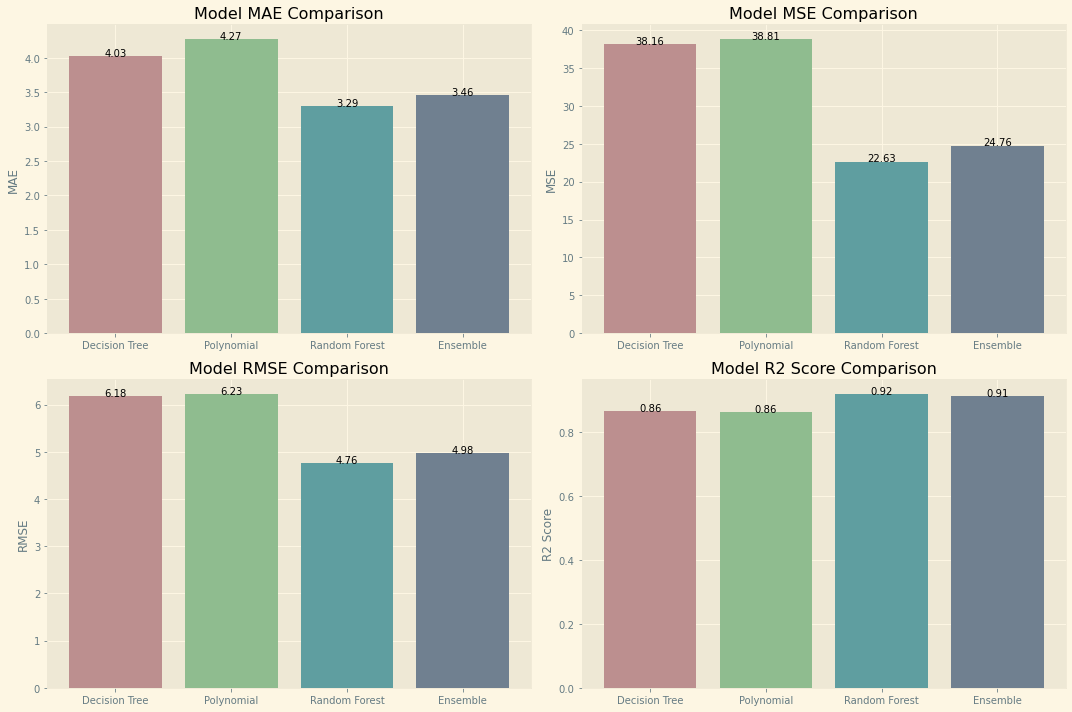

In [18]:
plt.style.use('Solarize_Light2')

# Calculate metrics
models = ['Decision Tree', 'Polynomial', 'Random Forest', 'Ensemble']
colors = ['rosybrown', 'darkseagreen', 'cadetblue', 'slategray']

mae_values = [mean_absolute_error(y_test, y_pred_optimized_dt),
              mean_absolute_error(y_test, best_model.predict(X_test)),  
              mean_absolute_error(y_test, y_pred_optimized_rf),
              mean_absolute_error(y_test, y_pred_ensemble)]

mse_values = [mean_squared_error(y_test, y_pred_optimized_dt),
              mean_squared_error(y_test, best_model.predict(X_test)),  
              mean_squared_error(y_test, y_pred_optimized_rf),
              mean_squared_error(y_test, y_pred_ensemble)]

rmse_values = [np.sqrt(mean_squared_error(y_test, y_pred_optimized_dt)),
               np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))),  
               np.sqrt(mean_squared_error(y_test, y_pred_optimized_rf)),
               np.sqrt(mean_squared_error(y_test, y_pred_ensemble))]

r2_values = [r2_score(y_test, y_pred_optimized_dt),
             r2_score(y_test, best_model.predict(X_test)),  
             r2_score(y_test, y_pred_optimized_rf),
             r2_score(y_test, y_pred_ensemble)]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# MAE Comparison
ax[0, 0].bar(models, mae_values, color=colors)
ax[0, 0].set_title('Model MAE Comparison')
ax[0, 0].set_ylabel('MAE')
for i in range(4):
    ax[0, 0].text(i, mae_values[i], round(mae_values[i], 2), ha='center')

# MSE Comparison
ax[0, 1].bar(models, mse_values, color=colors)
ax[0, 1].set_title('Model MSE Comparison')
ax[0, 1].set_ylabel('MSE')
for i in range(4):
    ax[0, 1].text(i, mse_values[i], round(mse_values[i], 2), ha='center')

# RMSE Comparison
ax[1, 0].bar(models, rmse_values, color=colors)
ax[1, 0].set_title('Model RMSE Comparison')
ax[1, 0].set_ylabel('RMSE')
for i in range(4):
    ax[1, 0].text(i, rmse_values[i], round(rmse_values[i], 2), ha='center')

# R2 Score Comparison
ax[1, 1].bar(models, r2_values, color=colors)
ax[1, 1].set_title('Model R2 Score Comparison')
ax[1, 1].set_ylabel('R2 Score')
for i in range(4):
    ax[1, 1].text(i, r2_values[i], round(r2_values[i], 2), ha='center')

plt.tight_layout()
plt.show()